# Лабораторна робота №2
### Студента групи МІТ-31
### Переверзева Олексія

#### Частина 1

Генеруємо набір даних

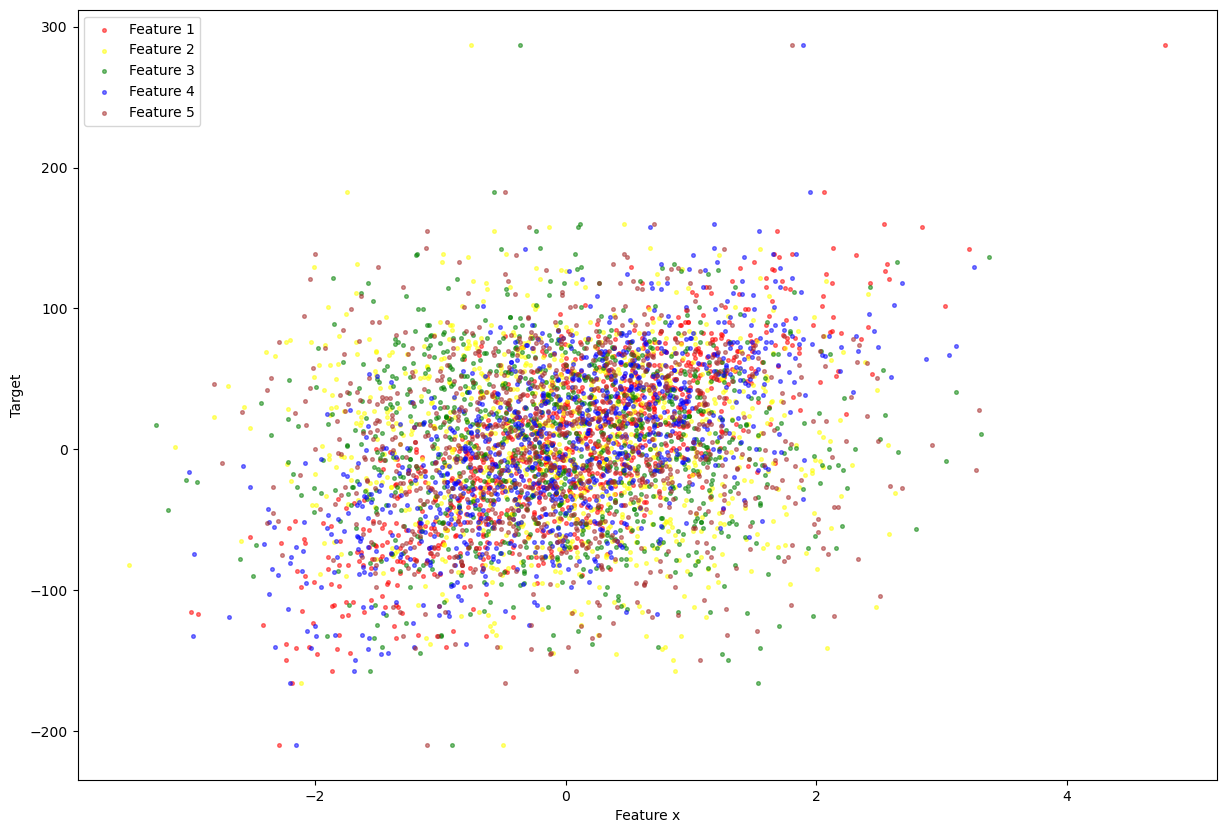

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

n_features = 5
X, y = make_regression(
    n_samples=1000, # Кількість екземплярів
    n_features=n_features, # Кількість параметрів
    n_informative=3, # Кількість інформативних параметрів 
    noise=10, # Рівень шуму
    random_state=55
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(n_features)])
data['Target'] = y

data.to_csv('data_part1.csv', index=False)

# Візуалізуємо згенеровані дані
plt.figure(figsize=(50, 10))
plt.subplot(132)
colors = ['Red', 'Yellow', 'Green', 'Blue', 'Brown']
for i in range (n_features):
    plt.scatter(X[:, i], y, s=7, color= colors[i], label=f'Feature {i+1}', alpha=0.5)
plt.xlabel('Feature x')
plt.ylabel('Target')
plt.legend()
plt.show()


In [26]:

data = pd.read_csv('data_part1.csv')

# Перегляд перших декількох рядків даних
print("Перші 5 рядків:")
print(data.head(5))

# Вивести основні статистичні показники даних
print("\nСтатистика:")
print(data.describe())

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("\nІнформація про дані:")
print(data.info())


Перші 5 рядків:
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5      Target
0   0.339666  -0.905620  -0.158379  -0.606846  -0.531254   -2.005825
1   1.239457   0.059409  -0.682896  -0.821571   0.300079   26.943205
2  -0.118852   0.063033  -1.587383  -0.400065  -0.788022  -35.452999
3   1.086627  -1.394968   0.036313  -2.517610  -0.823808  -26.624624
4   2.543132   0.464966   0.115557   1.184680   0.709315  159.695369

Статистика:
         Feature 1    Feature 2    Feature 3    Feature 4    Feature 5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.067915    -0.002574    -0.038424     0.019913    -0.009830   
std       0.984198     0.992452     1.017417     1.008759     0.994395   
min      -2.992683    -3.482114    -3.272435    -3.008301    -2.808375   
25%      -0.618386    -0.655003    -0.783372    -0.644163    -0.696106   
50%       0.087657     0.018758    -0.063457     0.042191    -0.024118   
75%       0.703012     0.676437     0.6

Розподіл даних

In [27]:
# Розділення даних на тренувальний і тестовий набори у співвідношенні 80%/20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

Побудова моделі регресії


MSE = 99.22 
R2 = 0.97


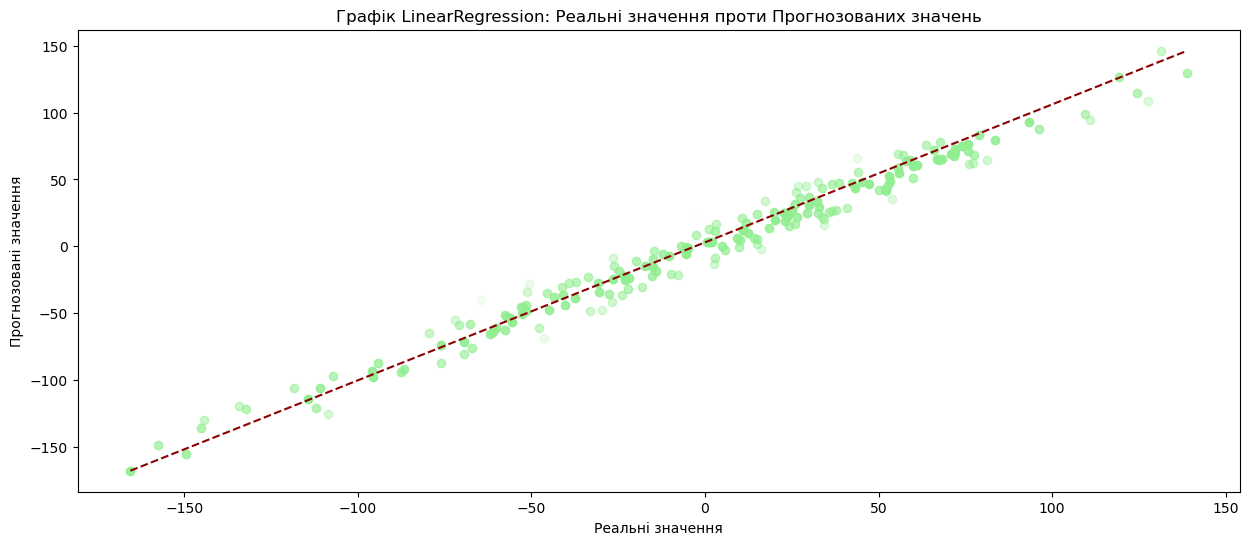

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Побудова моделі лінійної регресії
model_lr = LinearRegression()

# Тренування моделі
model_lr.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_lr = model_lr.predict(X_test)

# Оцінка точності моделі
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"\nMSE = {mse_lr:.2f} \nR2 = {r2_lr:.2f}")

# Відстань між справжніми та прогнозованими значеннями
distance = np.abs(y_test - y_pred_lr) 
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distance) 

# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(15, 6))
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred_lr[i], c='lightgreen', alpha=alpha)

plt.title('Графік LinearRegression: Реальні значення проти Прогнозованих значень')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], ls='--', c ='darkred')
plt.show()


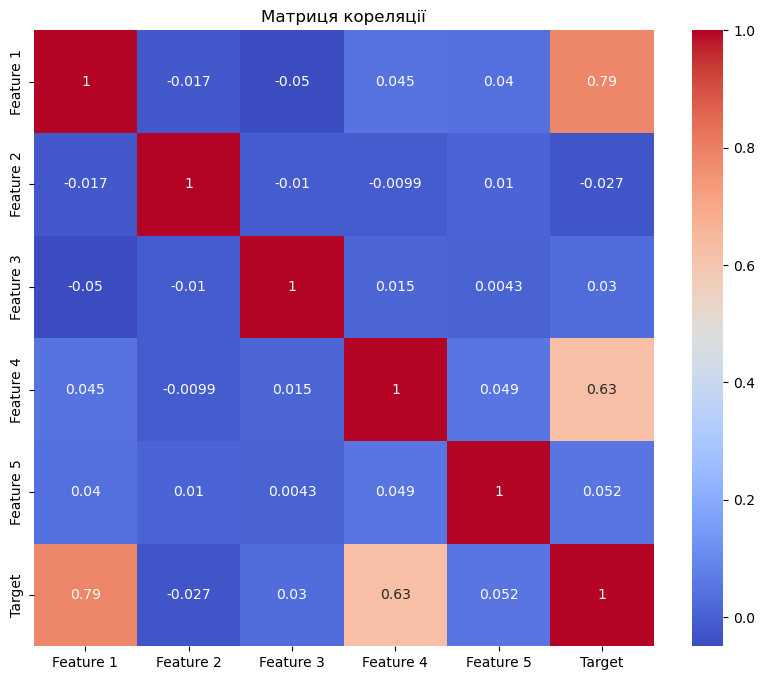

In [29]:
import seaborn as sb
correlation_matrix = data.corr()

# Візуалізація матриці кореляції
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Висновки: по результатам MSE та R2 можна зробити висновок, що модель має досить непогану чіткість

#### Частина 2

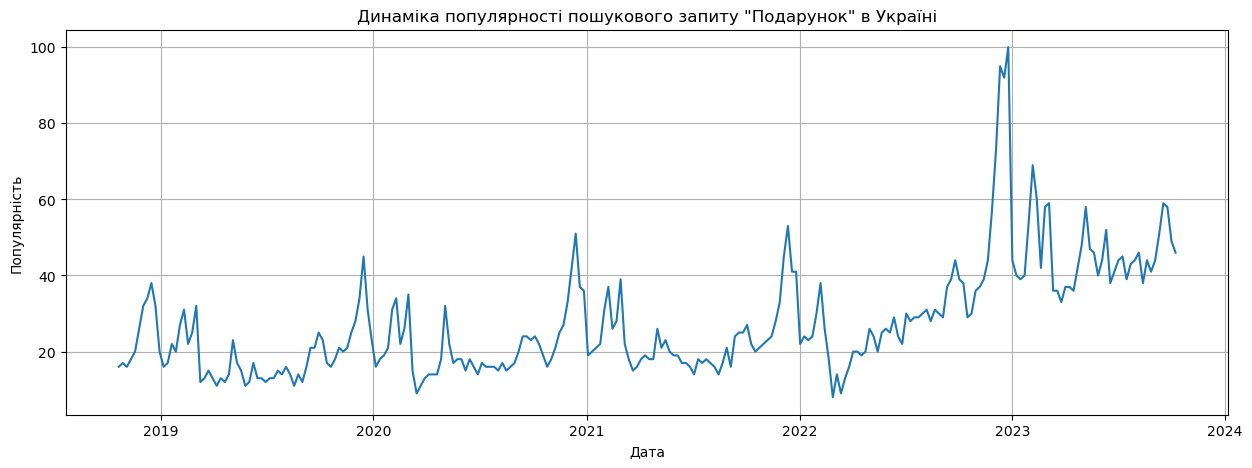

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('google_trends_Ukraine.csv', parse_dates=['Date'], index_col='Date')

# Числа позначають рівень інтересу до теми стосовно найвищого показника в таблиці для певного регіону та періоду часу. 
# 100 балів означають найвищий рівень популярності запиту, 50 – рівень популярності запиту, вдвічі менший порівняно з першим випадком. 
# 0 балів означає місце розташування, за яким недостатньо даних про розглянутий запит.

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Popularity'])
plt.grid()
plt.title('Динаміка популярності пошукового запиту "Подарунок" в Україні')
plt.xlabel('Дата')
plt.ylabel('Популярність')
plt.show()


In [31]:
from statsmodels.tsa.stattools import adfuller
# Перевірка стаціонарності часового ряду
result = adfuller(data)
print("Augmented Dickey-Fuller тест:")
print(f'ADF Statistic: {result[0]:.2f}')  
print(f'p-value: {result[1]:.2f}')
print('Критичні значення:')
for key, value in result[4].items():
    print(f'{key}: {value:.2f}')

Augmented Dickey-Fuller тест:
ADF Statistic: -1.41
p-value: 0.58
Критичні значення:
1%: -3.46
5%: -2.87
10%: -2.57


Розкладання часового ряду даних

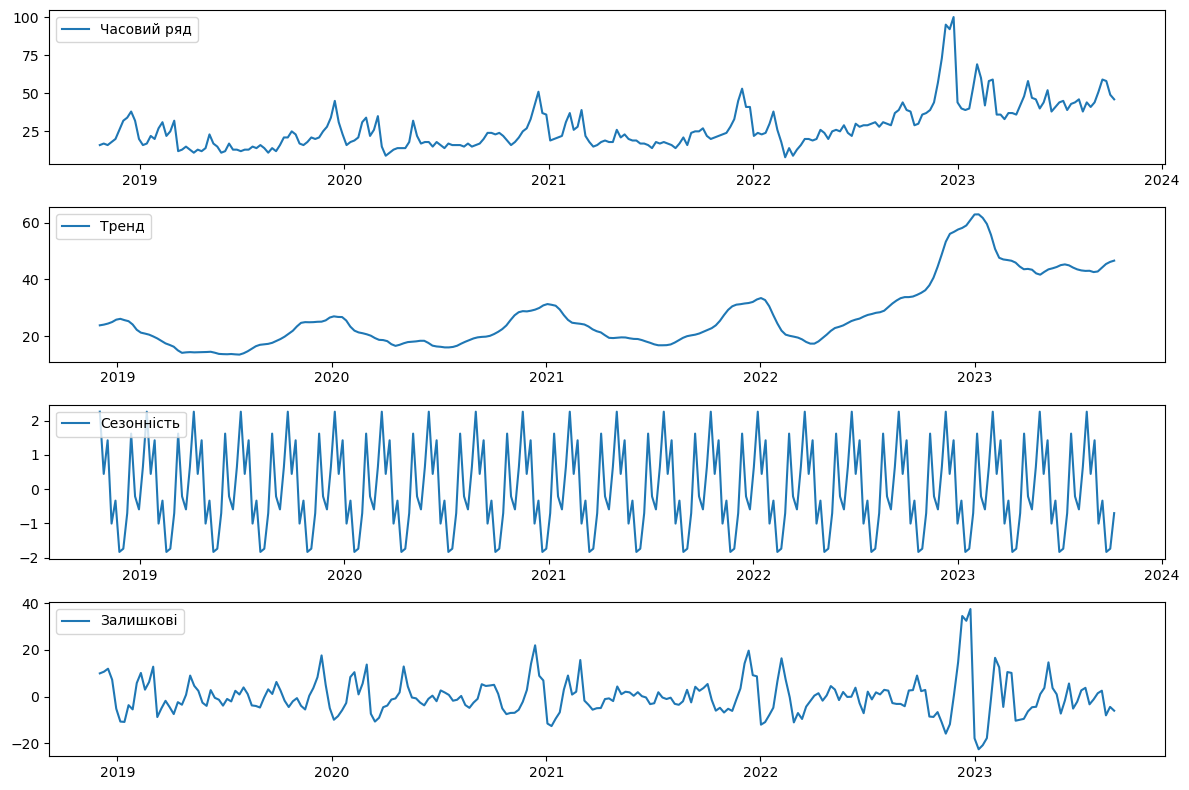

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Розділення часового ряду на тренд, сезонні та залишкові компоненти
decomposition = seasonal_decompose(data, model='additive', period=12)
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residuals = decomposition.resid

# Візуалізація компонентів
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Часовий ряд')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_component, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality_component, label='Сезонність')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Залишкові')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

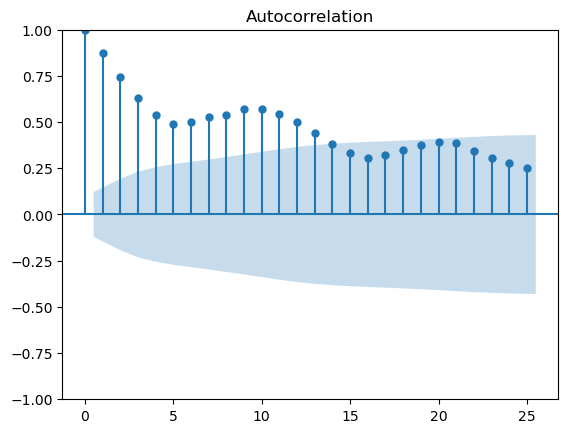

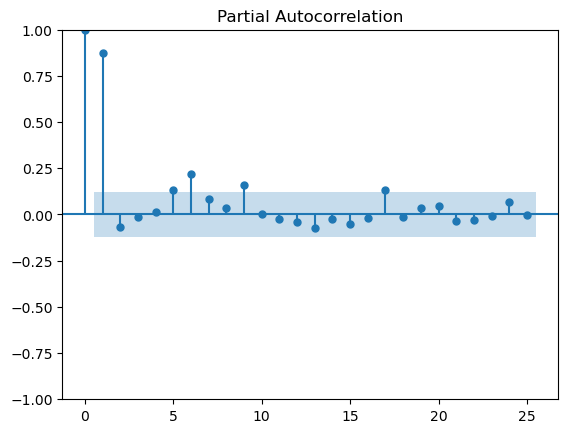

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Графіки автокореляції та часткової автокореляції
plot_acf(data)
plot_pacf(data)
plt.show()

In [34]:
# Підібираємо найкращі параметри для ARIMA
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(data['Popularity'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1732.584, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1757.892, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.882, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1759.880, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1755.960, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1737.530, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1736.973, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1732.655, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1732.057, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1738.631, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1732.226, Time=0.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1737.084, Time=0.22 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1727.559, Time=0.67 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:               SARIMAX(3, 1, 4)   Log Likelihood                -854.780
Date:                Sun, 15 Oct 2023   AIC                           1727.559
Time:                        07:01:44   BIC                           1759.571
Sample:                    10-21-2018   HQIC                          1740.430
                         - 10-08-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.011      0.774      0.439      -0.013       0.030
ar.L1          2.4375      0.085     28.545      0.000       2.270       2.605
ar.L2         -2.2971      0.139    -16.521      0.000      -2.570      -2.025
ar.L3          0.7896      0.084      9.390      0.000       0.625       0.954
ma.L1         -2.5817      0.121    -21.402      0.000      -2.818      -2.345
ma.L2          2.5172      0.272      9.266      0.000       1.985       3.050
ma.L3         -0.9295      0.242     -3.844      0.000      -1.403      -0.456
ma.L4          0.0113      0.081      0.139      0.889      -0.148       0.170
sigma2        43.4431      2.346     18.522      0.000      38.846      48.040
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               862.31
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Тренування моделі

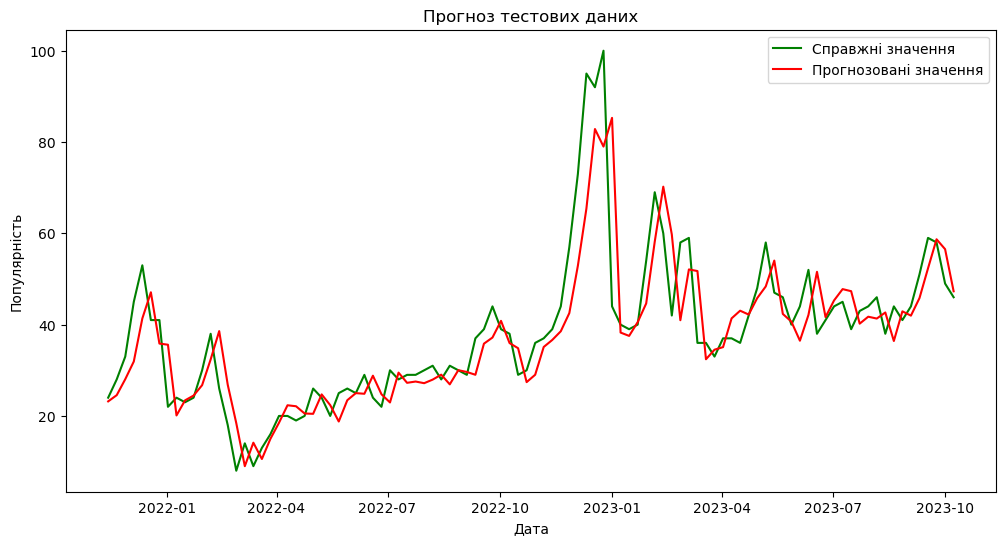

Середнє значення похибки: 38.21
Середньоквадратична помилка (MSE) 74.00


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

train = data.iloc[:-100]
test = data.iloc[-100:]

p, d, q = 3, 1, 4  # Параметри ARIMA
model = ARIMA(data, order=(p, d, q))
model = model.fit()

# Прогноз для тестових даних (для оцінки моделі)
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(12, 6))
plt.plot(data['Popularity'].iloc[-100:], label='Справжні значення', color='green')
plt.plot(pred, label='Прогнозовані значення', color='red')
plt.title('Прогноз тестових даних')
plt.xlabel('Дата')
plt.ylabel('Популярність')
plt.legend()
plt.show()

# Оцінка точності моделі
mae = test['Popularity'].mean()
print(f"Середнє значення похибки: {mae:.2f}")

mse = mean_squared_error(pred,test['Popularity'])
print(f"Середньоквадратична помилка (MSE) {mse:.2f}")

Прогнозування даних

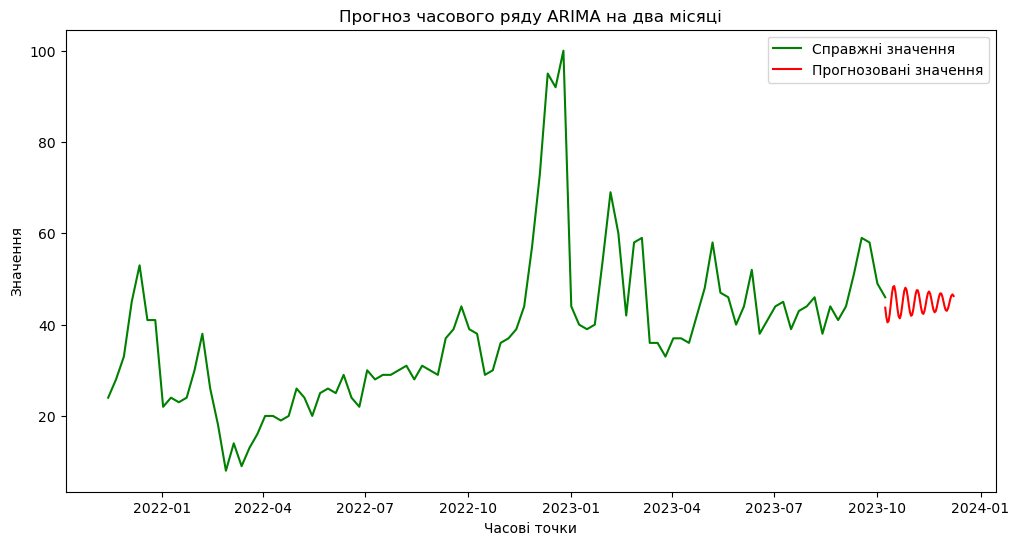

In [45]:
arima = ARIMA(data['Popularity'], order=(3,1,4))
arima = arima.fit()
data.tail

# Майбутні дати для прогнозу
index_future_dates = pd.date_range(start='2023-10-08', end='2023-12-08')   

# Прогноз на два місяці
pred = arima.predict(start=len(data), end=len(data)+61, typ='levels').rename('ARIMA Predictions')

# Індексування прогнозу
pred.index = index_future_dates

# Візуалізація прогнозованих даних
plt.figure(figsize=(12, 6))
plt.plot(data['Popularity'].iloc[-100:], label='Справжні значення', color='green')
plt.plot(pred, label='Прогнозовані значення', color='red')
plt.title('Прогноз часового ряду ARIMA на два місяці')
plt.xlabel('Часові точки')
plt.ylabel('Значення')

plt.legend()
plt.show()

Висновки: дивлячись на прогноз часового ряду ARIMA, можна стверджувати, що передбачення на даних, що залежать від часу, є не зовсім точними, чим довше прогнозування - тим більш неточним є результат.

#### Частина 3